In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip zip3.zip

Archive:  zip3.zip
   creating: zip3/
  inflating: zip3/.DS_Store          
  inflating: __MACOSX/zip3/._.DS_Store  
  inflating: zip3/yolo.yaml          
  inflating: __MACOSX/zip3/._yolo.yaml  
  inflating: zip3/yolo11n.pt         
   creating: zip3/images/
   creating: zip3/labels/
  inflating: zip3/images/.DS_Store   
  inflating: __MACOSX/zip3/images/._.DS_Store  
   creating: zip3/images/test/
   creating: zip3/images/train/
   creating: zip3/images/val/
  inflating: zip3/labels/.DS_Store   
  inflating: __MACOSX/zip3/labels/._.DS_Store  
   creating: zip3/labels/test/
   creating: zip3/labels/train/
   creating: zip3/labels/val/
  inflating: zip3/images/test/89.jpg  
  inflating: __MACOSX/zip3/images/test/._89.jpg  
  inflating: zip3/images/test/71.jpg  
  inflating: __MACOSX/zip3/images/test/._71.jpg  
  inflating: zip3/images/test/65.jpg  
  inflating: __MACOSX/zip3/images/test/._65.jpg  
  inflating: zip3/images/test/58.jpg  
  inflating: __MACOSX/zip3/images/test/._58.jpg  


In [ ]:
import os

# Change to your desired directory
os.chdir('/content/zip3')

In [ ]:
!wandb login

wandb: WARNING Using legacy-service, which is deprecated. If this is unintentional, you can fix it by ensuring you do not call `wandb.require('legacy-service')` and do not set the WANDB_X_REQUIRE_LEGACY_SERVICE environment variable.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: potholesinworld (potholesinworld-opensource-com) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.__version__)

True
1
2.6.0+cu124


In [ ]:
# Enable W&B logging for Ultralytics
!yolo settings wandb=True

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
JSONDict("/root/.config/Ultralytics/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/content/datasets",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": false,
  "wandb": true,
  "vscode_msg": true
}
💡 Learn more about Ultralytics Settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings


In [ ]:
!rm -r /content/__MACOSX

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [ ]:
from ultralytics import YOLO

# Load the pretrained YOLO model
model = YOLO("yolo11n.pt")

# Train the model using 2 GPUs (e.g., GPU 0 and GPU 1)
results = model.train(
    data="yolo.yaml",
    epochs=800,
    imgsz=640,
    device=0,          # Multi-GPU training
    project="pothole_yolo_project_zip3",   # W&B project name
    name="yolo11n_experiment_v2"    # W&B run name
)

Ultralytics 8.3.124 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=yolo.yaml, epochs=800, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=pothole_yolo_project_zip3, name=yolo11n_experiment_v2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

train: Scanning /content/zip3/labels/train.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 576.1±62.4 MB/s, size: 422.9 KB)


val: Scanning /content/zip3/labels/val.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to pothole_yolo_project_zip3/yolo11n_experiment_v2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to pothole_yolo_project_zip3/yolo11n_experiment_v2
Starting training for 800 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/800       4.7G      2.001      3.299      1.656         81        640: 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         20        111    0.00533      0.288    0.00506    0.00233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/800       4.7G      1.898      3.221      1.558         57        640: 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         20        111    0.00867      0.468     0.0403     0.0209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/800       4.7G      1.751      2.985      1.475        183        640:  60%|██████    | 3/5 [00:00<00:00,  2.93it/s]wandb: WARNING Tried to log to step 1 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 1 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 1 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 1 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 1 th

                   all         20        111      0.015      0.811      0.143     0.0849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/800       4.7G      1.697      2.464      1.401         33        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         20        111     0.0153      0.829      0.139     0.0739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/800       4.7G      1.676      2.178       1.38         65        640: 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         20        111     0.0139      0.486      0.144     0.0606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/800       4.7G      1.603       1.87      1.343         84        640: 100%|██████████| 5/5 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all         20        111      0.525      0.045      0.124      0.065

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/800       4.7G       1.62      1.738       1.39         71        640: 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         20        111      0.633      0.036      0.134     0.0612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/800       4.7G       1.65      1.655      1.388        203        640:  80%|████████  | 4/5 [00:00<00:00,  4.17it/s]wandb: WARNING Tried to log to step 3 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 3 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 3 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 4 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 4 th

                   all         20        111      0.743     0.0721      0.142     0.0654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/800       4.7G      1.561      1.566      1.346         66        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         20        111     0.0918      0.045      0.059     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/800       4.7G       1.64      1.637      1.395         51        640: 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         20        111      0.405     0.0991      0.123     0.0583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/800       4.7G      1.691      1.665      1.404         54        640: 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         20        111      0.435      0.104      0.188     0.0897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/800       4.7G      1.553      1.571      1.308         31        640: 100%|██████████| 5/5 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         20        111      0.342       0.18      0.171     0.0745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/800       4.7G      1.611      1.605      1.361        117        640:  60%|██████    | 3/5 [00:00<00:00,  5.17it/s]wandb: WARNING Tried to log to step 8 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 8 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 8 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 9 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 9 th

                   all         20        111      0.385      0.207       0.21     0.0992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/800       4.7G      1.609      1.637      1.362         68        640: 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         20        111      0.362      0.243      0.209     0.0847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/800       4.7G      1.628      1.597      1.383         44        640: 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         20        111      0.345      0.288      0.248      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/800       4.7G      1.553      1.527      1.349         46        640: 100%|██████████| 5/5 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         20        111      0.453      0.369      0.326      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/800       4.7G       1.58      1.543       1.35         45        640: 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         20        111      0.282      0.144      0.134     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/800       4.7G      1.536      1.496       1.35        145        640:  20%|██        | 1/5 [00:00<00:00,  5.38it/s]wandb: WARNING Tried to log to step 13 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 13 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 13 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 14 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 

                   all         20        111      0.165      0.216     0.0999      0.033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/800       4.7G      1.638      1.567      1.385         42        640: 100%|██████████| 5/5 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         20        111      0.164      0.162     0.0849     0.0327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/800       4.7G      1.595      1.485      1.356         45        640: 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         20        111       0.34      0.108      0.104     0.0463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/800       4.7G      1.554      1.463      1.347         50        640: 100%|██████████| 5/5 [00:01<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         20        111      0.331      0.126      0.148     0.0596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/800       4.7G      1.553      1.396       1.29         55        640: 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         20        111      0.274      0.216      0.192      0.081



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/800       4.7G      1.593      1.429      1.327         64        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]wandb: WARNING Tried to log to step 18 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 18 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 18 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 19 that is less than the current step 149. Steps must be monotonically inc

                   all         20        111      0.313      0.251      0.214     0.0983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/800       4.7G      1.491      1.356      1.276         77        640: 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         20        111      0.124      0.306      0.154     0.0715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/800       4.7G      1.503      1.381      1.284         47        640: 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         20        111      0.274      0.162      0.162     0.0683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/800       4.7G      1.512      1.367      1.294         59        640: 100%|██████████| 5/5 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         20        111      0.322      0.207      0.203     0.0846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/800       4.7G      1.541      1.372      1.312         79        640: 100%|██████████| 5/5 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         20        111      0.362      0.252      0.259      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/800       4.7G      1.533      1.366      1.299         45        640: 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]wandb: WARNING Tried to log to step 23 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 24 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 24 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 24 that is less than the current step 149. Steps must be monotonically increasing,

                   all         20        111      0.552      0.297      0.328      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/800       4.7G      1.448      1.308      1.252         71        640: 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         20        111       0.34      0.459      0.366      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/800       4.7G      1.412       1.28      1.247         59        640: 100%|██████████| 5/5 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         20        111       0.27      0.405      0.284       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/800       4.7G      1.435      1.317      1.286         41        640: 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         20        111      0.406       0.27      0.282      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/800       4.7G      1.457      1.276      1.294         63        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         20        111      0.236      0.279      0.171     0.0759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/800       4.7G      1.515      1.247      1.316         58        640: 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         20        111      0.288      0.306      0.218     0.0906



wandb: WARNING Tried to log to step 28 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 29 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 29 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 29 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 30 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https:


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/800       4.7G      1.439      1.309      1.269         41        640: 100%|██████████| 5/5 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]

                   all         20        111      0.354      0.279      0.227     0.0891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/800       4.7G      1.435      1.244      1.257         45        640: 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         20        111      0.304      0.234      0.219     0.0814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/800       4.7G      1.423      1.243      1.248         54        640: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]

                   all         20        111      0.345      0.396      0.303      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/800       4.7G      1.405      1.164      1.234         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]

                   all         20        111      0.487      0.387      0.361      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/800       4.7G      1.304       1.11      1.177         59        640: 100%|██████████| 5/5 [00:01<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         20        111      0.332       0.45      0.342       0.16



wandb: WARNING Tried to log to step 33 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 34 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 34 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 34 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 35 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https:


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/800       4.7G       1.41      1.182      1.243         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         20        111      0.333      0.459      0.309      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/800       4.7G      1.407      1.142      1.225         65        640: 100%|██████████| 5/5 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         20        111      0.476       0.41      0.368      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/800       4.7G        1.4      1.125      1.203         74        640: 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         20        111      0.487      0.477      0.404      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/800       4.7G      1.372      1.158      1.203         79        640: 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         20        111      0.464      0.468      0.416      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/800       4.7G      1.375      1.129      1.202         57        640: 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         20        111      0.617      0.423      0.457      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/800       4.7G      1.353       1.14      1.248        154        640:  60%|██████    | 3/5 [00:00<00:00,  4.37it/s]wandb: WARNING Tried to log to step 38 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 39 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 39 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 39 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 

                   all         20        111      0.447      0.477      0.454      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/800       4.7G      1.301      1.147       1.21         41        640: 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         20        111      0.348      0.505       0.39      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/800       4.7G      1.373      1.122      1.236         83        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         20        111      0.467      0.396       0.42      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/800       4.7G      1.433      1.164      1.248         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         20        111      0.539      0.486      0.479      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/800       4.7G      1.301      1.072      1.169         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all         20        111      0.477      0.542      0.492      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/800       4.7G      1.303      1.044      1.154        171        640:  60%|██████    | 3/5 [00:00<00:00,  4.87it/s]wandb: WARNING Tried to log to step 44 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 44 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 44 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 45 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 

                   all         20        111      0.577      0.486      0.493      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/800       4.7G      1.304      1.048       1.23         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         20        111      0.477      0.568      0.486      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/800       4.7G      1.309      1.071      1.195         64        640: 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         20        111      0.366      0.542      0.439      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/800       4.7G      1.313      1.072      1.196         54        640: 100%|██████████| 5/5 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         20        111      0.618      0.364      0.483      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/800       4.7G       1.29       1.07      1.194         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]

                   all         20        111      0.485      0.586       0.54      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/800       4.7G      1.225     0.9657      1.134        147        640:  40%|████      | 2/5 [00:00<00:00,  5.83it/s]wandb: WARNING Tried to log to step 49 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 49 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 49 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 50 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 

                   all         20        111      0.607       0.64      0.617      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/800       4.7G       1.25      1.009       1.17         83        640: 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


                   all         20        111      0.632      0.557      0.606      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/800       4.7G       1.34      1.092      1.199         57        640: 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all         20        111      0.519      0.535      0.465      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/800       4.7G      1.294      1.049      1.176         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         20        111      0.546      0.495      0.502       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/800       4.7G      1.275      1.002      1.169         44        640: 100%|██████████| 5/5 [00:01<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         20        111       0.51      0.469      0.468      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/800       4.7G      1.302      1.062      1.201        126        640:  80%|████████  | 4/5 [00:01<00:00,  3.25it/s]wandb: WARNING Tried to log to step 54 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 54 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 54 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 55 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 

                   all         20        111      0.415      0.514      0.462      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/800       4.7G      1.284      1.033      1.175         63        640: 100%|██████████| 5/5 [00:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         20        111      0.569       0.56      0.545      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/800       4.7G      1.286      1.041      1.185         58        640: 100%|██████████| 5/5 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


                   all         20        111      0.618       0.55      0.515      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/800       4.7G      1.259       1.01      1.164         77        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         20        111      0.596       0.55      0.499      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/800       4.7G      1.217     0.9169      1.131         50        640: 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         20        111      0.536      0.505      0.478       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/800       4.7G      1.268       0.98      1.182         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         20        111      0.565      0.514      0.516      0.228



wandb: WARNING Tried to log to step 59 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 59 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 59 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 60 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 60 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https:


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/800       4.7G      1.293     0.9626      1.162         75        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         20        111      0.563      0.558      0.545      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/800       4.7G      1.208     0.9098      1.121         63        640: 100%|██████████| 5/5 [00:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         20        111      0.508      0.558        0.5      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/800       4.7G       1.24     0.9574      1.146         75        640: 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         20        111      0.575      0.501      0.498      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/800       4.7G      1.237     0.9604      1.134         33        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         20        111      0.527      0.583       0.52      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/800       4.7G      1.242     0.9545       1.16         82        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]wandb: WARNING Tried to log to step 64 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 65 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 65 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 65 that is less than the current step 149. Steps must be monotonically increasing,

                   all         20        111      0.557      0.532      0.548      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/800       4.7G      1.179      0.893      1.135         42        640: 100%|██████████| 5/5 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         20        111      0.565      0.516      0.544      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/800       4.7G      1.196     0.9187      1.122         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         20        111      0.662       0.53      0.562      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/800       4.7G      1.217     0.9243      1.164         35        640: 100%|██████████| 5/5 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         20        111      0.572      0.505      0.537      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/800       4.7G      1.206     0.8907      1.118         59        640: 100%|██████████| 5/5 [00:01<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         20        111      0.527      0.481      0.496      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/800       4.7G      1.258     0.8762      1.132        137        640:  60%|██████    | 3/5 [00:00<00:00,  4.18it/s]wandb: WARNING Tried to log to step 69 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 70 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 70 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 70 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 

                   all         20        111      0.526      0.477      0.465      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/800       4.7G      1.199     0.8772      1.124         69        640: 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         20        111      0.497      0.514      0.487      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/800       4.7G      1.219     0.9363      1.127         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         20        111      0.472      0.523      0.459      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/800       4.7G      1.227     0.8764      1.119         74        640: 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         20        111      0.527      0.492      0.428       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/800       4.7G      1.155     0.8312      1.107         48        640: 100%|██████████| 5/5 [00:01<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         20        111      0.585      0.459      0.455       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/800       4.7G      1.237      0.902      1.123         36        640: 100%|██████████| 5/5 [00:01<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         20        111      0.588      0.463      0.513      0.267



wandb: WARNING Tried to log to step 74 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 74 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 74 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 75 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 75 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https:


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/800       4.7G      1.217     0.8633      1.111         66        640: 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         20        111      0.483      0.477       0.45      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/800       4.7G      1.164     0.8804      1.104         56        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         20        111       0.62       0.45      0.475      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/800       4.7G      1.165     0.8758      1.097         36        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


                   all         20        111      0.638       0.46      0.482      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/800       4.7G      1.122     0.7886      1.084         80        640: 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         20        111      0.654      0.432      0.496      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/800       4.7G      1.143     0.8369      1.107         61        640: 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         20        111       0.57      0.541      0.504       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/800       4.7G      1.093     0.8677      1.127        115        640:  20%|██        | 1/5 [00:00<00:00,  5.92it/s]wandb: WARNING Tried to log to step 79 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 80 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 80 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 80 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 

                   all         20        111      0.647      0.477       0.53      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/800       4.7G      1.126     0.8167      1.105         51        640: 100%|██████████| 5/5 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         20        111      0.597      0.559      0.551      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/800       4.7G      1.125     0.8172      1.096         68        640: 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         20        111      0.591      0.631      0.607      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/800       4.7G      1.107     0.8581      1.098         46        640: 100%|██████████| 5/5 [00:01<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         20        111       0.71      0.477      0.579      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/800       4.7G      1.165     0.8457      1.138         33        640: 100%|██████████| 5/5 [00:00<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         20        111      0.609      0.586       0.59      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/800       4.7G      1.146     0.7609      1.111        173        640:  20%|██        | 1/5 [00:00<00:00,  5.96it/s]wandb: WARNING Tried to log to step 85 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 85 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 85 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 86 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 

                   all         20        111      0.606      0.568      0.594      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/800       4.7G      1.114     0.8272      1.101         47        640: 100%|██████████| 5/5 [00:01<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         20        111      0.696      0.468      0.577      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/800       4.7G      1.128     0.8005      1.097         41        640: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         20        111      0.509       0.56      0.542      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/800       4.7G      1.071     0.7947       1.07         65        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         20        111      0.576      0.595      0.591      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/800       4.7G       1.17     0.8285      1.101         72        640: 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         20        111      0.709      0.523      0.599      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/5 [00:00<?, ?it/s]wandb: WARNING Tried to log to step 90 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 90 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 90 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 91 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 91 that is less than the current step 149. Steps must be monotonically increasing, so t

                   all         20        111      0.635      0.486      0.541      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/800       4.7G      1.139     0.7723       1.07         73        640: 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         20        111      0.531      0.477      0.457      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/800       4.7G      1.142      0.777      1.048         79        640: 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         20        111      0.548      0.459      0.472      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/800       4.7G      1.219     0.8612      1.102         59        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         20        111      0.586      0.433      0.482       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/800       4.7G      1.102     0.7974      1.076         77        640: 100%|██████████| 5/5 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         20        111      0.512      0.514       0.49      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/800       4.7G      1.142      0.779      1.098         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         20        111      0.588      0.505      0.544      0.265



wandb: WARNING Tried to log to step 95 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 95 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 95 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 96 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 96 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https:


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/800       4.7G      1.157     0.8028      1.087         46        640: 100%|██████████| 5/5 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         20        111      0.582      0.505      0.549      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/800       4.7G       1.08     0.7337      1.044         53        640: 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         20        111       0.64      0.468      0.527      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/800       4.7G      1.095     0.7942      1.082         69        640: 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all         20        111      0.605      0.477      0.536      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/800       4.7G       1.15     0.8008      1.086         73        640: 100%|██████████| 5/5 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         20        111      0.662      0.559      0.597      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/800       4.7G       1.09     0.7829      1.085         34        640: 100%|██████████| 5/5 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         20        111      0.709      0.586      0.618      0.302



wandb: WARNING Tried to log to step 100 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 101 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 101 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 101 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 102 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See h


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/800       4.7G      1.113     0.7476       1.05         65        640: 100%|██████████| 5/5 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]

                   all         20        111      0.756      0.532      0.637      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/800       4.7G      1.087     0.7615      1.059         84        640: 100%|██████████| 5/5 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all         20        111      0.676      0.545      0.619      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/800       4.7G      1.057     0.7263      1.068         80        640: 100%|██████████| 5/5 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         20        111      0.725      0.593      0.629      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/800       4.7G      1.052      0.737      1.062         59        640: 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         20        111      0.677      0.577      0.623      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/800       4.7G      1.121     0.7675      1.097         52        640: 100%|██████████| 5/5 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         20        111       0.71      0.559      0.615      0.322



wandb: WARNING Tried to log to step 105 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 106 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 106 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 106 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 107 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See h


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/800       4.7G      1.029     0.7199      1.044         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         20        111      0.655      0.598       0.61      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/800       4.7G      1.026     0.7079      1.051         61        640: 100%|██████████| 5/5 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         20        111      0.628      0.486      0.558      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/800       4.7G      1.046     0.7633      1.067         33        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         20        111      0.591      0.495      0.547      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/800       4.7G      1.073     0.7567      1.074         67        640: 100%|██████████| 5/5 [00:01<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         20        111      0.666      0.477      0.557      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/800       4.7G      1.075     0.7332      1.057         95        640: 100%|██████████| 5/5 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         20        111      0.613      0.571      0.589      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/800       4.7G      1.069     0.7412      1.042        169        640:  40%|████      | 2/5 [00:00<00:00,  4.26it/s]wandb: WARNING Tried to log to step 110 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 111 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 111 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 111 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to s

                   all         20        111      0.667      0.577      0.634      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/800       4.7G      1.108     0.7625      1.124         42        640: 100%|██████████| 5/5 [00:01<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         20        111      0.756      0.495      0.604        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/800       4.7G      1.046      0.687      1.028         57        640: 100%|██████████| 5/5 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         20        111      0.638       0.55      0.589       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/800       4.7G      1.043     0.7258      1.046         49        640: 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         20        111      0.608      0.514       0.57      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/800       4.7G       1.02     0.7117      1.043         67        640: 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         20        111      0.614      0.517      0.529      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/800       4.7G      1.018     0.6858       1.02        161        640:  60%|██████    | 3/5 [00:00<00:00,  5.73it/s]wandb: WARNING Tried to log to step 116 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 116 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 116 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 117 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to s

                   all         20        111      0.566      0.528      0.504      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/800       4.7G      1.015     0.6796      1.048         36        640: 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         20        111      0.617      0.432      0.479      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/800       4.7G     0.9995     0.6988      1.054         28        640: 100%|██████████| 5/5 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         20        111      0.475      0.505      0.477      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/800       4.7G      1.071     0.7467      1.071         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         20        111      0.664      0.387      0.431      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/800       4.7G     0.9795     0.6623      1.017         49        640: 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         20        111      0.597      0.486      0.466      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/800       4.7G     0.9994     0.7197      1.035         99        640:  40%|████      | 2/5 [00:00<00:00,  5.50it/s]wandb: WARNING Tried to log to step 121 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 121 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 121 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 122 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to s

                   all         20        111      0.506      0.441      0.397      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/800       4.7G     0.9987     0.6672     0.9992         66        640: 100%|██████████| 5/5 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         20        111      0.592      0.414      0.421      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/800       4.7G      1.006     0.6921      1.048         62        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         20        111      0.619      0.541      0.544      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/800       4.7G     0.9832     0.6873      1.014         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         20        111      0.638      0.541      0.564      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/800       4.7G      1.059     0.7384      1.039         46        640: 100%|██████████| 5/5 [00:01<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         20        111      0.585      0.622      0.589      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/800       4.7G      1.005     0.6786       1.02        134        640:  60%|██████    | 3/5 [00:00<00:00,  4.15it/s]wandb: WARNING Tried to log to step 126 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 126 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 126 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 127 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to s

                   all         20        111      0.551      0.676      0.606      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/800       4.7G      1.024     0.7022      1.058         51        640: 100%|██████████| 5/5 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         20        111      0.618      0.613      0.586      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/800       4.7G     0.9828     0.6586      1.026         70        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]

                   all         20        111      0.606      0.631      0.597      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/800       4.7G      1.077     0.7995      1.091         21        640: 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         20        111      0.589      0.667      0.607       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/800       4.7G     0.9732      0.703      1.018         34        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         20        111        0.6       0.64      0.611      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/800       4.7G      0.993     0.6737      1.021         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         20        111      0.654      0.523      0.569      0.268



wandb: WARNING Tried to log to step 131 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 131 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 131 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 132 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 132 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See h


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/800       4.7G     0.9946     0.6908      1.048         51        640: 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         20        111       0.65       0.55      0.577      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/800       4.7G      1.022     0.6954      1.048         99        640: 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         20        111      0.584      0.555      0.595       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/800       4.7G     0.9987     0.6912      1.013         67        640: 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         20        111      0.604      0.577      0.608       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/800       4.7G     0.9642     0.6942      1.028         32        640: 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         20        111      0.677      0.604      0.631      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/800       4.7G     0.9584     0.6488      1.029         48        640: 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         20        111      0.702      0.614      0.646       0.33



wandb: WARNING Tried to log to step 136 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 137 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 137 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 137 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 138 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See h


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/800       4.7G       1.03     0.7059      1.042         44        640: 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         20        111      0.649      0.634      0.647      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/800       4.7G       1.02     0.6807      1.035         47        640: 100%|██████████| 5/5 [00:01<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         20        111      0.635      0.581      0.632       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/800       4.7G      1.033     0.6807      1.061         48        640: 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         20        111      0.682      0.521      0.575      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/800       4.7G      1.032     0.6583      1.044         34        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         20        111      0.686      0.505      0.573      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/800       4.7G     0.9975     0.6738      1.018         58        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         20        111      0.628      0.532      0.538      0.282



wandb: WARNING Tried to log to step 141 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 142 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 142 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 142 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 143 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See h


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/800       4.7G      1.004     0.6761       1.01         73        640: 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all         20        111       0.64      0.514      0.536      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/800       4.7G      1.004     0.6857      1.024         35        640: 100%|██████████| 5/5 [00:01<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         20        111      0.661       0.51       0.55      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/800       4.7G     0.9334     0.6478      1.016         40        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         20        111      0.652      0.507      0.565      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/800       4.7G     0.9064     0.6789      1.022         36        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         20        111      0.716      0.476      0.558      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/800       4.7G      1.011     0.6627      1.039         59        640: 100%|██████████| 5/5 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         20        111       0.55      0.523      0.536      0.261



wandb: WARNING Tried to log to step 146 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 147 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 147 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 147 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 148 that is less than the current step 149. Steps must be monotonically increasing, so this data will be ignored. See h


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/800       4.7G     0.9035     0.6302      1.001         38        640: 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


                   all         20        111      0.738      0.477       0.56      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/800       4.7G     0.9873     0.6507      1.015         82        640: 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all         20        111      0.735      0.459      0.527      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/800       4.7G     0.9629     0.6208      1.014         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         20        111      0.675      0.414      0.471       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/800       4.7G     0.9051     0.6319      1.018         39        640: 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         20        111      0.626      0.423      0.456      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/800       4.7G     0.9926      0.679      1.016         52        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         20        111      0.651      0.486      0.515      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/800       4.7G     0.8872     0.6093     0.9885         39        640: 100%|██████████| 5/5 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         20        111      0.661      0.486      0.546      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/800       4.7G     0.9548     0.6274     0.9826        108        640: 100%|██████████| 5/5 [00:01<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         20        111      0.671      0.532       0.59      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/800       4.7G     0.9408     0.6073     0.9897         79        640: 100%|██████████| 5/5 [00:01<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         20        111      0.657      0.495      0.597      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/800       4.7G     0.9898     0.6427      1.019         69        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         20        111      0.505      0.495      0.481      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/800       4.7G     0.9429       0.65      0.991         81        640: 100%|██████████| 5/5 [00:01<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         20        111      0.482      0.486      0.474      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/800       4.7G     0.9355     0.6252     0.9968         63        640: 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         20        111       0.56       0.45      0.461      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/800       4.7G      0.953     0.6455       1.01         52        640: 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         20        111      0.531      0.477      0.467      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/800       4.7G     0.9707     0.6197      1.006         61        640: 100%|██████████| 5/5 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         20        111      0.632      0.573      0.595      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/800       4.7G     0.9508     0.6279          1         49        640: 100%|██████████| 5/5 [00:01<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         20        111      0.735       0.55      0.602      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/800       4.7G     0.8819     0.5795     0.9692         84        640: 100%|██████████| 5/5 [00:01<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         20        111      0.706      0.577      0.619      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/800       4.7G     0.8788     0.5902      0.973         67        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         20        111      0.727      0.595      0.621      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/800       4.7G     0.9273     0.6425     0.9936         49        640: 100%|██████████| 5/5 [00:01<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all         20        111      0.635      0.568      0.551      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/800       4.7G     0.8838     0.6002     0.9769         93        640: 100%|██████████| 5/5 [00:01<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         20        111      0.579      0.559      0.535      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/800       4.7G      0.875     0.5948     0.9765         77        640: 100%|██████████| 5/5 [00:01<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         20        111      0.573      0.544      0.513      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/800       4.7G     0.9182     0.5896      1.005         59        640: 100%|██████████| 5/5 [00:01<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         20        111      0.584      0.583      0.531      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/800       4.7G     0.8923     0.5769     0.9931         70        640: 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         20        111      0.687      0.577      0.626      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/800       4.7G     0.8698     0.5831     0.9646         46        640: 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         20        111      0.672      0.622      0.638      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/800       4.7G     0.9205     0.6134      1.001         52        640: 100%|██████████| 5/5 [00:01<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         20        111      0.652      0.595      0.629      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/800       4.7G     0.8731     0.5759     0.9596         66        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         20        111      0.695      0.555      0.606      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/800       4.7G     0.8841     0.5992     0.9718         65        640: 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         20        111      0.666      0.593      0.612      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/800       4.7G     0.9352     0.6563      1.037         34        640: 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all         20        111      0.625        0.6        0.6      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/800       4.7G     0.8831     0.5803     0.9935         37        640: 100%|██████████| 5/5 [00:01<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         20        111      0.698       0.55      0.609      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/800       4.7G     0.9397      0.614     0.9866        114        640: 100%|██████████| 5/5 [00:01<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         20        111      0.739      0.541      0.631      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/800       4.7G     0.9017     0.6485      1.003         64        640: 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         20        111      0.585      0.649      0.609      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/800       4.7G     0.9016     0.6002      1.002         46        640: 100%|██████████| 5/5 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         20        111      0.624      0.622      0.642      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/800       4.7G     0.9048     0.6062     0.9818         60        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         20        111      0.683      0.613      0.664      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/800       4.7G     0.9437     0.6189      0.999         75        640: 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         20        111      0.719       0.55      0.649      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/800       4.7G     0.8773     0.5789     0.9847         78        640: 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         20        111      0.562      0.694      0.656      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/800       4.7G      0.853     0.5605     0.9846         55        640: 100%|██████████| 5/5 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         20        111      0.789      0.507      0.658      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/800       4.7G     0.9139      0.603      0.993         65        640: 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         20        111      0.657      0.604      0.666      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/800       4.7G     0.8742     0.6131     0.9897         70        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         20        111      0.651      0.604      0.646      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/800       4.7G     0.9108     0.5745      0.987         49        640: 100%|██████████| 5/5 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         20        111      0.646      0.568      0.609      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/800       4.7G     0.8528     0.5809     0.9517        100        640: 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         20        111      0.665      0.541      0.599      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/800       4.7G     0.8778     0.5957     0.9898         46        640: 100%|██████████| 5/5 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         20        111      0.607      0.523      0.575      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/800       4.7G     0.8596      0.582     0.9816         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         20        111      0.517      0.647      0.595      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/800       4.7G     0.8732      0.598      1.003         34        640: 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         20        111       0.66      0.568      0.631      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/800       4.7G     0.8999     0.5787       0.99         53        640: 100%|██████████| 5/5 [00:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         20        111      0.633      0.622      0.626      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/800       4.7G     0.8671     0.5681      1.012         50        640: 100%|██████████| 5/5 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         20        111      0.664      0.622      0.596      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/800       4.7G     0.8709     0.5791          1         47        640: 100%|██████████| 5/5 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         20        111      0.659       0.61      0.583        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/800       4.7G     0.9276      0.594     0.9923         49        640: 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]

                   all         20        111      0.598       0.64      0.554      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/800       4.7G     0.8811     0.6033      1.004         40        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


                   all         20        111       0.59      0.604       0.57      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/800       4.7G     0.9312     0.6282      1.014         94        640: 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         20        111      0.618      0.583      0.573      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/800       4.7G     0.8637       0.59     0.9621         76        640: 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         20        111      0.649      0.583       0.56      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/800       4.7G     0.8799     0.5795     0.9737         63        640: 100%|██████████| 5/5 [00:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         20        111      0.604      0.486      0.519      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/800       4.7G     0.8705     0.5792     0.9676         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         20        111      0.573      0.532      0.505       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/800       4.7G     0.8563     0.5697     0.9728         61        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         20        111      0.599      0.498      0.479      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/800       4.7G     0.8367     0.5902     0.9855        102        640: 100%|██████████| 5/5 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         20        111       0.47      0.514      0.444      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/800       4.7G     0.8416     0.5686     0.9743         44        640: 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all         20        111      0.681      0.423      0.496      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/800       4.7G      0.823     0.5719      0.978         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         20        111      0.603      0.451      0.501      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/800       4.7G     0.8464     0.5673     0.9875         54        640: 100%|██████████| 5/5 [00:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         20        111      0.507      0.486       0.51      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/800       4.7G     0.9489     0.6285      1.011         46        640: 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         20        111      0.673      0.423      0.532      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/800       4.7G     0.8524     0.5618     0.9548         78        640: 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         20        111      0.599      0.459      0.483      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/800       4.7G     0.8452     0.5759     0.9829         71        640: 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         20        111        0.6      0.423      0.459      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/800       4.7G     0.8314     0.5626      0.971         73        640: 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         20        111      0.538      0.441      0.444       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/800       4.7G     0.8643     0.5664     0.9711         70        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         20        111      0.541       0.45      0.463       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/800       4.7G     0.8471     0.5734     0.9615         46        640: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         20        111      0.582      0.459      0.469      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/800       4.7G     0.7859     0.5319     0.9516         38        640: 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         20        111      0.546      0.477      0.484      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/800       4.7G     0.8373     0.5757     0.9637         96        640: 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         20        111      0.647      0.432      0.523      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/800       4.7G     0.8633     0.5457     0.9792         55        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         20        111      0.471      0.613       0.54      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/800       4.7G     0.8313     0.5467     0.9474         59        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         20        111      0.616      0.396       0.49      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/800       4.7G     0.8771     0.5589     0.9956         41        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         20        111       0.56      0.423      0.463      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/800       4.7G     0.8221     0.5475     0.9478         51        640: 100%|██████████| 5/5 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         20        111      0.529      0.441      0.472      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/800       4.7G     0.8614     0.5666      1.001         54        640: 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         20        111      0.542      0.432      0.474      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/800       4.7G     0.8121     0.5412     0.9389         86        640: 100%|██████████| 5/5 [00:01<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         20        111      0.547      0.514      0.507      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/800       4.7G     0.8346     0.5614      0.951         61        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         20        111      0.612      0.532      0.552      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/800       4.7G     0.8244     0.5519       0.95         58        640: 100%|██████████| 5/5 [00:01<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         20        111      0.741      0.514      0.572      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/800       4.7G     0.8028     0.5506     0.9644         38        640: 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all         20        111      0.735      0.477       0.55       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/800       4.7G     0.8571     0.5693     0.9684         58        640: 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         20        111      0.661      0.559      0.587      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/800       4.7G     0.8724     0.5638     0.9529         76        640: 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all         20        111       0.69      0.577      0.596      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/800       4.7G      0.839      0.585      0.955         80        640: 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         20        111      0.731      0.568        0.6      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/800       4.7G     0.8504     0.5535     0.9654         54        640: 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         20        111      0.705      0.561      0.598      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/800       4.7G     0.8249     0.5842     0.9503         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all         20        111       0.74      0.532      0.615       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/800       4.7G       0.84     0.5424     0.9745         63        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         20        111       0.72      0.559      0.615      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/800       4.7G     0.8577     0.5617     0.9852         46        640: 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         20        111      0.724      0.568      0.609      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/800       4.7G     0.7661     0.5206     0.9348         45        640: 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         20        111      0.647       0.64      0.601      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/800       4.7G     0.8326     0.5417     0.9766         45        640: 100%|██████████| 5/5 [00:01<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         20        111      0.645      0.622      0.613      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/800       4.7G     0.8557     0.5444     0.9517         44        640: 100%|██████████| 5/5 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         20        111      0.669      0.586      0.594      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/800       4.7G     0.8382     0.5514     0.9928         48        640: 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         20        111      0.664      0.613      0.607      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/800       4.7G     0.7964     0.5244     0.9404         76        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         20        111      0.708      0.568      0.607      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/800       4.7G     0.7934     0.5087     0.9391         75        640: 100%|██████████| 5/5 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]


                   all         20        111      0.726      0.573      0.611       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/800       4.7G      0.774     0.5281     0.9517         34        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         20        111       0.69      0.568      0.613      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/800       4.7G     0.8174     0.5292     0.9664         52        640: 100%|██████████| 5/5 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         20        111      0.624      0.595        0.6      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/800       4.7G      0.793       0.56     0.9596         40        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]

                   all         20        111       0.61      0.579      0.579      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/800       4.7G     0.9175     0.5829     0.9633         75        640: 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         20        111      0.621      0.545      0.583      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/800       4.7G     0.8002     0.5163     0.9562         54        640: 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         20        111      0.645      0.559      0.602      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/800       4.7G     0.8176     0.5315     0.9574         58        640: 100%|██████████| 5/5 [00:01<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         20        111      0.664      0.586      0.629      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/800       4.7G     0.8242     0.5276     0.9572         52        640: 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all         20        111      0.689      0.599      0.631      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/800       4.7G     0.8532     0.5411     0.9467         93        640: 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         20        111      0.611      0.631      0.627      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/800       4.7G      0.823     0.5529     0.9527         40        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         20        111      0.748      0.559      0.644      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/800       4.7G      0.821     0.5405     0.9478         79        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         20        111      0.651      0.568      0.619      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/800       4.7G     0.7715     0.5086     0.9463         84        640: 100%|██████████| 5/5 [00:01<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         20        111      0.736      0.528      0.631      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/800       4.7G     0.7652     0.5091     0.9286         59        640: 100%|██████████| 5/5 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         20        111      0.714      0.517      0.618      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/800       4.7G     0.7858     0.5228     0.9553         46        640: 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         20        111      0.753      0.522      0.598      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/800       4.7G     0.7918     0.5312     0.9831         54        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         20        111      0.692      0.514      0.566      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/800       4.7G      0.776     0.5041     0.9377         78        640: 100%|██████████| 5/5 [00:01<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         20        111      0.683      0.505      0.542      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/800       4.7G     0.7634     0.5218     0.9481         35        640: 100%|██████████| 5/5 [00:01<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         20        111      0.608      0.558      0.569      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/800       4.7G     0.7546     0.4923     0.9308         62        640: 100%|██████████| 5/5 [00:01<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         20        111      0.612      0.586      0.575        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/800       4.7G     0.8124      0.519     0.9516         59        640: 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         20        111      0.642      0.586      0.582      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/800       4.7G     0.7929     0.5044     0.9361         55        640: 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         20        111        0.7      0.532      0.582      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/800       4.7G     0.8306      0.545     0.9707         67        640: 100%|██████████| 5/5 [00:01<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all         20        111      0.578      0.604       0.57      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/800       4.7G     0.7783     0.5141     0.9341         55        640: 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         20        111      0.669      0.529      0.553      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/800       4.7G     0.7602     0.5186      0.929         80        640: 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         20        111      0.643      0.541      0.545      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/800       4.7G     0.7594     0.5054      0.925         66        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         20        111      0.583      0.516       0.54      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/800       4.7G     0.7868     0.5328     0.9663         58        640: 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         20        111      0.588      0.523      0.538      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/800       4.7G     0.7894     0.5069     0.9315         45        640: 100%|██████████| 5/5 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         20        111      0.682      0.521      0.567      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/800       4.7G     0.7861     0.5383     0.9284         87        640: 100%|██████████| 5/5 [00:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         20        111      0.699      0.545      0.576      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/800       4.7G     0.7521     0.5018     0.9309         78        640: 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         20        111      0.692      0.577      0.595      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/800       4.7G     0.8039     0.5182     0.9288         72        640: 100%|██████████| 5/5 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         20        111      0.738       0.55      0.622      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/800       4.7G      0.763     0.5038     0.9291         55        640: 100%|██████████| 5/5 [00:01<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]

                   all         20        111      0.612      0.649      0.613      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/800       4.7G     0.7995     0.5232     0.9627         47        640: 100%|██████████| 5/5 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         20        111      0.598      0.631      0.615      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/800       4.7G     0.7386     0.4894     0.9342         62        640: 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         20        111      0.655      0.613      0.611      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/800       4.7G      0.788     0.5134     0.9482         78        640: 100%|██████████| 5/5 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         20        111      0.648      0.581      0.602      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/800       4.7G     0.7887     0.5453     0.9591         34        640: 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         20        111       0.58      0.568      0.567      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/800       4.7G     0.7708     0.5209     0.9494         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         20        111      0.563      0.569      0.574       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/800       4.7G     0.7806     0.5226     0.9468         36        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         20        111      0.518      0.586      0.565      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/800       4.7G     0.7767     0.5268     0.9494         73        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         20        111      0.657      0.535      0.611      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/800       4.7G     0.7727     0.5113     0.9199         69        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         20        111      0.646       0.55      0.619      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/800       4.7G     0.7421     0.4948     0.9247         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         20        111      0.638      0.586      0.614      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/800       4.7G     0.7763     0.5177     0.9356         42        640: 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         20        111      0.672      0.541      0.602      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/800       4.7G     0.7412     0.4988      0.933         67        640: 100%|██████████| 5/5 [00:01<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         20        111       0.58      0.622      0.588      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/800       4.7G     0.7218      0.478     0.9259         60        640: 100%|██████████| 5/5 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         20        111      0.586      0.604      0.579      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/800       4.7G     0.7947     0.5461     0.9923         27        640: 100%|██████████| 5/5 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         20        111      0.592      0.586      0.582      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/800       4.7G     0.7668     0.5041     0.9411         49        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         20        111      0.748      0.495      0.599      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/800       4.7G     0.7533     0.5033     0.9245         73        640: 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         20        111      0.604      0.604      0.573      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/800       4.7G     0.7406     0.5049     0.9106         63        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         20        111      0.614      0.631      0.575      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/800       4.7G     0.7719     0.5115     0.9195         84        640: 100%|██████████| 5/5 [00:01<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         20        111       0.62      0.559      0.551      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/800       4.7G     0.7937      0.539     0.9636         35        640: 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         20        111      0.619      0.532      0.519      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/800       4.7G     0.7783     0.5237     0.9484         33        640: 100%|██████████| 5/5 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         20        111      0.599      0.578      0.545      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/800       4.7G     0.7511      0.506     0.9408         56        640: 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         20        111      0.632      0.541      0.509      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/800       4.7G     0.7724     0.5279     0.9399         89        640: 100%|██████████| 5/5 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         20        111      0.676       0.55      0.562      0.266
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 186, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



286 epochs completed in 0.158 hours.
Optimizer stripped from pothole_yolo_project_zip3/yolo11n_experiment_v2/weights/last.pt, 5.5MB
Optimizer stripped from pothole_yolo_project_zip3/yolo11n_experiment_v2/weights/best.pt, 5.5MB

Validating pothole_yolo_project_zip3/yolo11n_experiment_v2/weights/best.pt...
Ultralytics 8.3.124 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]


                   all         20        111      0.654      0.604      0.666      0.366
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to pothole_yolo_project_zip3/yolo11n_experiment_v2


lr/pg0,███▇▇▇▇▆▆▆▄▄▄▄▃▃▃▂▂▂▁▁▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▄▄▃
lr/pg1,▁▂▃▄▆█████▇▇▇▇▇▇▇▆▆▆▅▇▇▇▇▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆
lr/pg2,▁▃▄▇█▇▆▆▅▅▃▃▃▃▂▂▂▂▁▁▆▆▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃
metrics/mAP50(B),▁▂▃▃▅▇▇▇▆▆▇▆▆▆▇▆▇█▇▇██▇▆▆█▇██▇▇▆▆▇▆▇█▇▇▇
metrics/mAP50-95(B),▁▂▁▁▄▅▄▅▄▄▆▆▆▆▆▆▇▆▆▇▇▇██▆▇▇▅▅▆▇▇▇▇▇▇▆▇▆▆
metrics/precision(B),▁▆▄▃▄▄▅▆▆▅▇▇▆▇▆▇▆▇▆▇▇██▇▆▇▇▇▆▅█▇██▇▆▇▆▇▆
metrics/recall(B),▁▁▁▂▃▆▄▆▇▇▆▅▆▆█▇█▇▇██▆▆▅▇▇▆█▇▇▆▇▇▆▆▆▆▇▇▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,██▇▆▆▅▅▅▅▄▄▄▄▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▂▁▁▁▁▁▁


In [ ]:
from ultralytics import YOLO

# Load a mode`l
model = YOLO("/content/zip2/runs/detect/train3/weights/best.pt")  # pretrained YOLO11n model

# Run batched inference on a list of images
results = model(["/content/zip2/images/train/1.jpg", "/content/zip2/images/train/11.jpg"])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk

FileNotFoundError: [Errno 2] No such file or directory: '/content/zip2/runs/detect/train3/weights/best.pt'

In [ ]:
import cv2
import os

from ultralytics import YOLO

# Load the YOLO model
model = YOLO("/content/pothole_yolo.pt")

# Open the video file
video_path = "input_video.mp4"
cap = cv2.VideoCapture(video_path)

# Get video properties for output video
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(5))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use 'mp4v' for MP4 format
output_video_path = "output_video.mp4"  # Change the output file name if needed
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLO inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Write the annotated frame to the output video
        out.write(annotated_frame)

    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture and writer objects
cap.release()
out.release()

print(f"Inference video saved to: {output_video_path}")


0: 384x640 11 potholes, 32.5ms
Speed: 2.4ms preprocess, 32.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 potholes, 50.3ms
Speed: 2.9ms preprocess, 50.3ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 potholes, 37.1ms
Speed: 4.9ms preprocess, 37.1ms inference, 7.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 potholes, 53.4ms
Speed: 14.1ms preprocess, 53.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 potholes, 42.4ms
Speed: 15.2ms preprocess, 42.4ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 potholes, 69.5ms
Speed: 4.2ms preprocess, 69.5ms inference, 14.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 potholes, 12.8ms
Speed: 4.8ms preprocess, 12.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 potholes, 12.2ms
Speed: 2.9ms preprocess, 12.2ms inference, 1.9ms postprocess per

In [ ]:
import cv2
from google.colab import drive

# Mount Google Drive
# drive.mount('/content/drive')

# Paths and settings
input_path = "/content/drive/MyDrive/IMG_2429.MOV"  # Upload this to Colab first
output_path = "/content/drive/MyDrive/clip_30sec.mp4"
start_time_sec = 1 * 10
duration_sec = 30

# Load video
cap = cv2.VideoCapture(input_path)
fps = cap.get(cv2.CAP_PROP_FPS)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Frame range
start_frame = int(start_time_sec * fps)
end_frame = int((start_time_sec + duration_sec) * fps)
cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

# Extract and save
frame_number = start_frame
while cap.isOpened() and frame_number < end_frame:
    ret, frame = cap.read()
    if not ret:
        break
    out.write(frame)
    frame_number += 1

cap.release()
out.release()
print("✅ Clip saved to Google Drive:", output_path)

✅ Clip saved to Google Drive: /content/drive/MyDrive/clip_30sec.mp4


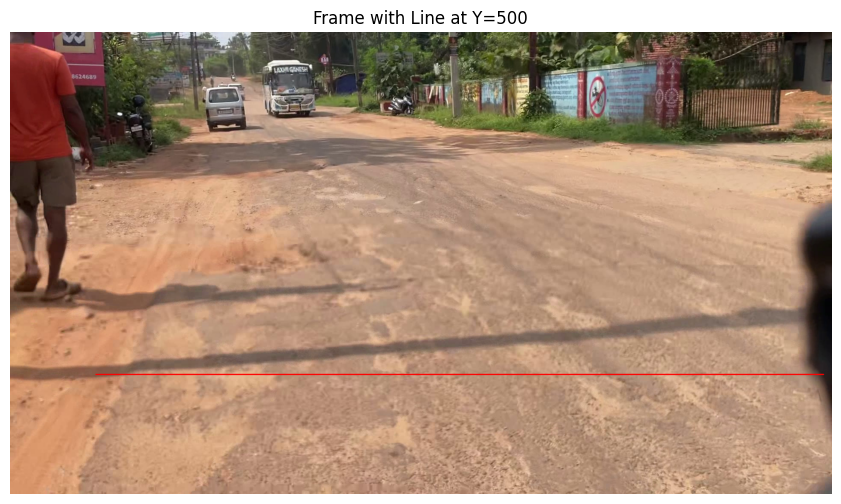

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Path to your video
video_path = "/content/drive/MyDrive/clip_1min.mp4"

# Load the video
cap = cv2.VideoCapture(video_path)

# Frame number to extract
frame_number = 3256  # Change as needed

# Move to the desired frame
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Read the frame
success, frame = cap.read()

if success:
    # Draw the extended line
    start_point = (200, 800)
    end_point = (1900, 800)
    color = (0, 0, 255)  # Red in BGR
    thickness = 2

    cv2.line(frame, start_point, end_point, color, thickness)

    # Convert BGR (OpenCV) to RGB (matplotlib)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display using matplotlib
    plt.figure(figsize=(12, 6))
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.title("Frame with Line at Y=500")
    plt.show()
else:
    print("Failed to extract frame.")

cap.release()


In [ ]:
import cv2
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append("/content/drive/MyDrive/colab_packages")

from ultralytics import solutions

cap = cv2.VideoCapture("/content/drive/MyDrive/clip_1min.mp4")
assert cap.isOpened(), "Error reading video file"

# region_points = [(0, 360), (1279, 360)]
# region_points = [(-500, 800), (1900, 800)]
region_points = [(200, 800), (1900, 800)]                                      # line counting
# region_points = [(20, 400), (1080, 400), (1080, 360), (20, 360)]  # rectangle region
# region_points = [(20, 400), (1080, 400), (1080, 360), (20, 360), (20, 400)]   # polygon region

# Video writer
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
video_writer = cv2.VideoWriter("/content/drive/MyDrive/object_counting_output.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Initialize object counter object
counter = solutions.ObjectCounter(
    show=True,  # display the output
    region=region_points,  # pass region points
    model="/content/drive/MyDrive/pothole_yolo.pt",  # model="yolo11n-obb.pt" for object counting with OBB model.
    # classes=[0, 2],  # count specific classes i.e. person and car with COCO pretrained model.
    # tracker="botsort.yaml",  # choose trackers i.e "bytetrack.yaml"
)

# Process video frames
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or processing is complete.")
        break

    # Process the frame
    results = counter(im0)

    # Write the frame to the output video
    video_writer.write(im0)

cap.release()
video_writer.release()
cv2.destroyAllWindows()  # destroy all opened windows

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics Solutions: ✅ {'source': None, 'model': '/content/drive/MyDrive/pothole_yolo.pt', 'classes': None, 'show_conf': True, 'show_labels': True, 'region': [(200, 800), (1900, 800)], 'colormap': 21, 'show_in': True, 'show_out': True, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'figsize': (12.8, 7.2), 'blur_ratio': 0.5, 'vision_point': (20, 20), 'crop_dir': 'cropped-detections', 'json_file': None, 'line_width': 2, 'records': 5, 'fps': 30.0, 'max_hist': 5, 'meter_per_pixel': 0.05, 'max_speed': 120, 'show': True, '

KeyboardInterrupt: 